<a href="https://www.kaggle.com/code/ayushbhuyar/zomatoeda?scriptVersionId=218218979" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-dataset/zomato.csv


In [2]:
!pip list

Package                            Version              Editable project location
---------------------------------- -------------------- -------------------------
absl-py                            1.4.0
accelerate                         1.2.1
aiobotocore                        2.17.0
aiofiles                           22.1.0
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.10
aioitertools                       0.12.0
aiosignal                          1.3.2
aiosqlite                          0.20.0
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
alembic                            1.14.0
altair                             5.5.0
annotated-types                    0.7.0
annoy                              1.17.3
ansicolors                         1.1.8
antlr4-python3-runtime             4.9.3
anyio                              3.7.1
argon2-cffi                        23.1.0
argon

In [3]:
df = pd.read_csv("/kaggle/input/zomato-dataset/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# Lets Perform EDA 

# 1.Handel Missing Values

In [7]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
#we will drop phone number because of no use
df.drop(columns = ['phone'] , inplace=True)

In [9]:

df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
df['rate'] = df['rate'].replace( ['NEW','nan'] , '0')

In [11]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '0', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
df['rate'] = df['rate'].replace(['NAN','NEW'], '0')


df['rate'] = df['rate'].str.split('/').str[0].str.strip()


df['rate'] = df['rate'].str.split(' /').str[0].str.strip()


df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df['rate'] = df['rate'].astype(float)


df['rate'] = df['rate'].fillna(0)

df['rate'].unique()


array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [13]:
df['rate'].isnull().sum()

0

In [14]:
df.drop(columns = 'dish_liked', axis = True)

,url,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,0.0,0,Whitefield,Bar,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,0.0,0,Whitefield,Bar,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [15]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [16]:
#reomve commmas
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace("," , "")
#convert it into numeric 
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors = 'coerce')

In [17]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median())

In [18]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [19]:
df['rest_type'] = df['rest_type'].fillna("Casual Dining")

In [20]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                          21
rest_type                          0
dish_liked                     28078
cuisines                          45
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [21]:

df['cuisines'] = df['cuisines'].fillna('North Indian')

In [22]:
df.dropna(subset = ['location'], inplace = True)


In [23]:
df['location'].isnull().sum()

0

In [24]:
df.drop(columns = 'dish_liked', inplace = True)

In [25]:
df.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

# Data Visulization

In [26]:


import matplotlib.pyplot as plt
import seaborn as sns



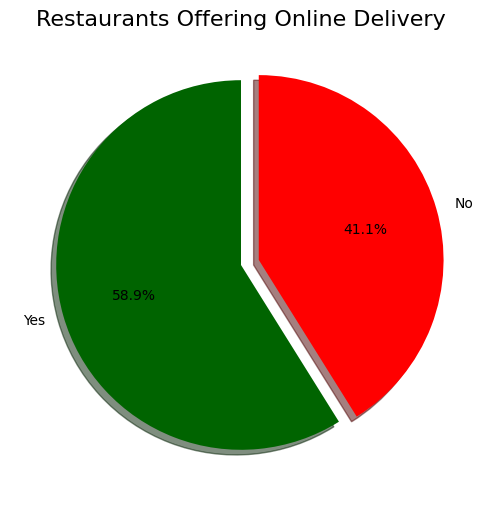

In [27]:
#Restaurants delivering Online or not
# Calculate value counts
online_order_counts = df['online_order'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(online_order_counts, labels=online_order_counts.index, autopct='%1.1f%%', explode = [0 ,.1] , shadow = True ,colors=['darkgreen', 'red'], startangle=90)

# Add title
plt.title('Restaurants Offering Online Delivery', fontsize=16)

# Show the plot
plt.show()

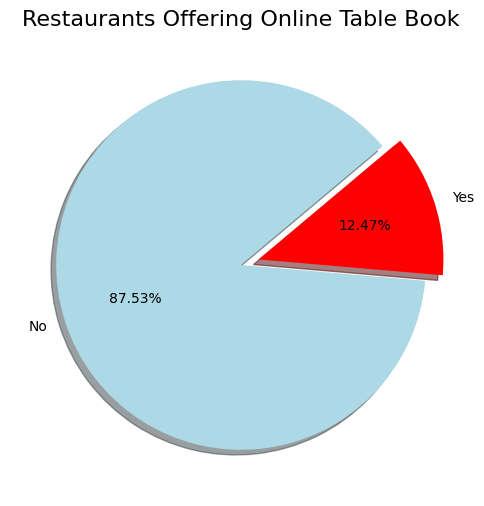

In [28]:
#Restaurants allowing table booking or not
book_table_counts = df['book_table'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(book_table_counts, labels=book_table_counts.index, autopct='%0.2f%%', explode = [0 ,.1] , shadow = True ,colors=['lightblue', 'red'], startangle=40)

# Add title
plt.title('Restaurants Offering Online Table Book', fontsize=16)

# Show the plot
plt.show()

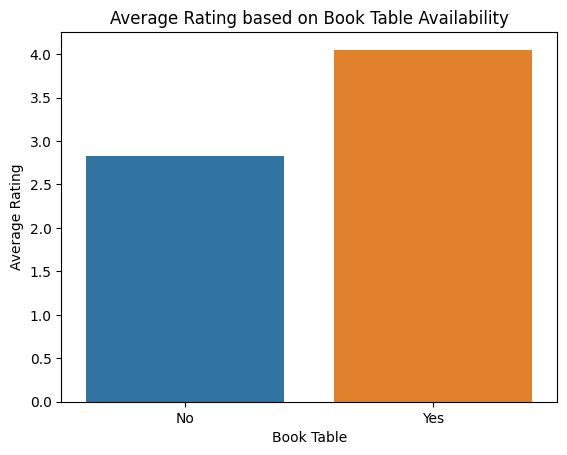

In [29]:
#Table booking Rate vs Rate
avg_ratings = df.groupby('book_table')['rate'].mean().reset_index()

# make a bar plot to visual the data
sns.barplot(x='book_table', y='rate', data=avg_ratings)

plt.xlabel('Book Table')
plt.ylabel('Average Rating')
plt.title('Average Rating based on Book Table Availability')
plt.show()


In [30]:
#Calculate count of restaurants in each city
import plotly.express as px

# Calculate count of restaurants in each city
city_counts = df['listed_in(city)'].value_counts().reset_index()
city_counts.columns = ['listed_in(city)', 'count']

# Create a bar plot using Plotly
fig = px.bar(city_counts, 
             x='count', 
             y='listed_in(city)', 
             orientation='h',  # Horizontal bar plot
             labels={'count': 'Count of Restaurants', 'listed_in(city)': 'Restaurant City'},  # Axis labels
             title='Number of Restaurants in Each Location')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Count of Restaurants',
    yaxis_title='Restaurant City',
    title_font_size=20,
    title_x=0.5,  # Center the title
    yaxis={'categoryorder': 'total ascending'}  # Sort bars by count
)

# Show the plot
fig.show()

In [31]:
#Best Location

# Group by location and calculate metrics
location_stats = df.groupby('listed_in(city)').agg(
    num_restaurants=('name', 'count'),  # Number of restaurants
    avg_rating=('rate', 'mean'),        # Average rating
    online_order_percentage=('online_order', lambda x: (x == 'Yes').mean() * 100),  # % offering online order
    table_booking_percentage=('book_table', lambda x: (x == 'Yes').mean() * 100)    # % offering table booking
).reset_index()

# Display the results
location_stats

,listed_in(city),num_restaurants,avg_rating,online_order_percentage,table_booking_percentage
0,BTM,3278,2.951769,65.009152,11.622941
1,Banashankari,863,3.093163,63.267671,4.982619
2,Bannerghatta Road,1616,2.677908,62.500000,7.240099
3,Basavanagudi,1266,3.139179,62.717220,9.715640
4,Bellandur,1227,2.868378,66.911165,11.165444
5,Brigade Road,1769,3.188751,51.780667,19.785189
6,Brookefield,1518,2.698748,63.636364,8.168643
7,Church Street,1827,3.175424,48.604269,19.868637
8,Electronic City,1228,2.356433,45.928339,7.817590
9,Frazer Town,1185,3.000084,60.168776,10.886076


In [32]:
# #best location by Number of Restaurants
import plotly.express as px

# # Sort by number of restaurants
location_stats_sorted = location_stats.sort_values(by='num_restaurants', ascending=False)

# # Create a bar plot
# fig = px.(location_stats_sorted, 
#              x='listed_in(city)', 
#              y='num_restaurants', 
#              title='Number of Restaurants by Location',
#              labels={'listed_in(city)': 'Location', 'num_restaurants': 'Number of Restaurants'})

# # Show the plot
# fig.show()

fig = px.sunburst(location_stats_sorted,
                 path = ['listed_in(city)'],
                 values = 'num_restaurants' , 
                 title = 'Number of Restaurants by Location',
                 labels = {'listed_in(city)' : 'Location' , 'num_restaurants': 'Number of Restaurants'},
                 color = 'num_restaurants',
                 color_continuous_scale= 'blugrn')
fig.update_layout(
    margin = dict(t=50 , l=25 , r=25 , b=25),
    title_font_size = 20,
    title_x = 0.5
)
fig.show()

In [33]:
#best location by average rating
# Sort by average rating
# Create a sunburst chart
fig = px.sunburst(location_stats_sorted, 
                  path=['listed_in(city)'],  # Hierarchy (only locations in this case)
                  values='avg_rating',       # Size of sectors based on average rating
                  title='Average Rating by Location (Sunburst)',
                  labels={'listed_in(city)': 'Location', 'avg_rating': 'Average Rating'},
                  color='avg_rating',        # Color sectors based on average rating
                  color_continuous_scale='Blues')  # Use a color scale

# Update layout for better readability
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),  # Adjust margins
    title_font_size=20,                   # Increase title font size
    title_x=0.5                           # Center the title
)

# Show the plot
fig.show()

# Bit of Machinne Learning

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the columns
scaler = MinMaxScaler()
location_stats[['num_restaurants_norm', 'avg_rating_norm', 'online_order_percentage_norm', 'table_booking_percentage_norm']] = scaler.fit_transform(
    location_stats[['num_restaurants', 'avg_rating', 'online_order_percentage', 'table_booking_percentage']]
)

# Display the normalized data
location_stats.head()

,listed_in(city),num_restaurants,avg_rating,online_order_percentage,table_booking_percentage,num_restaurants_norm,avg_rating_norm,online_order_percentage_norm,table_booking_percentage_norm
0,BTM,3278,2.951769,65.009152,11.622941,1.000000,0.692367,0.876956,0.446078
1,Banashankari,863,3.093163,63.267671,4.982619,0.048463,0.856806,0.808970,0.000000
2,Bannerghatta Road,1616,2.677908,62.500000,7.240099,0.345154,0.373871,0.779000,0.151651
3,Basavanagudi,1266,3.139179,62.717220,9.715640,0.207250,0.910321,0.787480,0.317951
4,Bellandur,1227,2.868378,66.911165,11.165444,0.191883,0.595384,0.951210,0.415344


In [35]:
# Define weights
weights = {
    'avg_rating_norm': 0.4,
    'num_restaurants_norm': 0.2,
    'online_order_percentage_norm': 0.15,
    'table_booking_percentage_norm': 0.15,
    'avg_cost_norm': 0.1
}

In [36]:
# Calculate overall rating
location_stats['overall_rating'] = (
    location_stats['avg_rating_norm'] * weights['avg_rating_norm'] +
    location_stats['num_restaurants_norm'] * weights['num_restaurants_norm'] +
    location_stats['online_order_percentage_norm'] * weights['online_order_percentage_norm'] +
    location_stats['table_booking_percentage_norm'] * weights['table_booking_percentage_norm']
)

# Display the overall rating
print(location_stats[['listed_in(city)', 'overall_rating']].sort_values(by='overall_rating', ascending=False))

          listed_in(city)  overall_rating
16  Koramangala 4th Block        0.712362
19  Koramangala 7th Block        0.690204
18  Koramangala 6th Block        0.684218
0                     BTM        0.675402
5            Brigade Road        0.671514
17  Koramangala 5th Block        0.671189
11            Indiranagar        0.667484
21                MG Road        0.663616
7           Church Street        0.652125
13              Jayanagar        0.631522
25       Old Airport Road        0.618905
22           Malleshwaram        0.595920
27         Residency Road        0.594997
20           Lavelle Road        0.591053
3            Basavanagudi        0.571393
12               JP Nagar        0.505078
10                    HSR        0.497557
9             Frazer Town        0.497175
28          Sarjapur Road        0.485991
4               Bellandur        0.481514
1            Banashankari        0.473761
23           Marathahalli        0.416598
26            Rajajinagar        0

In [37]:
# Merge overall rating with the original dataset
df = df.merge(location_stats[['listed_in(city)', 'overall_rating']], on='listed_in(city)', how='left')

# Display the updated dataset
df.head()

,url,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),overall_rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,0.473761
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,0.473761
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,0.473761
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,0.473761
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,0.473761


In [38]:
import plotly.express as px

# Sort by overall rating
location_stats_sorted = location_stats.sort_values(by='overall_rating', ascending=False)

# Create a bar plot
fig = px.sunburst(location_stats_sorted, 
             path = ['listed_in(city)'], 
             #y='overall_rating', 
                     values = 'overall_rating',
                     title='Overall Rating by Location',
                     labels={'listed_in(city)': 'Location', 'overall_rating': 'Overall Rating'},
                     color = 'overall_rating',
                     color_continuous_scale = 'sunset' )
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),  # Adjust margins
    title_font_size=20,                   # Increase title font size
    title_x=0.5                           # Center the title
)
# Show the plot
fig.show()

In [39]:
#Restaurant type
# Create a pie chart with percentage labels
rest_type_counts = df['rest_type'].value_counts().reset_index()
fig = px.pie(rest_type_counts, 
             names='rest_type', 
             values='count', 
             title='Proportion of Restaurant Types',
             hover_data=['count'], 
             labels={'count': 'Number of Restaurants'})

# Update layout to show percentages
fig.update_traces(textposition='inside', textinfo='percent+label')

# Show the plot
fig.show()

# Inferences

This Dataset has helped me to showcase my EDA skills & I have digged some insight from this

1. Around **58.9%** Restuarants offers Online Delivery
2. Only **12.47%** Restuarnts offers Online Table Book
3. Avergae rating of Online book table is **4.0**
4. BTM has highest number of resturants **3278**
5. Best Location by Average Rating is **MG Road**
6. Best Location by Overall Rating is **Kormangla 4th Block** (we have done ml for this , used normalization method for                                                                                                             overall rating)
7. **Quick Bites hold 37%**  of Restuarant Type